In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data

In [4]:
X = StandardScaler().fit_transform(X)

In [9]:
X.shape

(150, 4)

### K means

In [24]:
kmeans = KMeans(random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labeles)

In [25]:
kmeans.inertia_

64.42674849482276

### Hierarchial

In [6]:
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
hier_labels = hier.fit_predict(X)
hier_silhouette = silhouette_score(X, hier_labels)

### DBSCAN

In [14]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
mask = dbscan_labels != -1
if len(set(dbscan_labels))>1:
    dbscan_silhouette = silhouette_score(X[mask], dbscan_labels[mask])
else:
    dbscan_silhouette = -1

In [23]:
print("Silhouette Scores:")
print(f"K-Means: {kmeans_silhouette:.3f}")
print(f"Hierarchical: {hier_silhouette:.3f}")
print(f"DBSCAN: {dbscan_silhouette:.3f}")

Silhouette Scores:
K-Means: 0.480
Hierarchical: 0.447
DBSCAN: 0.598


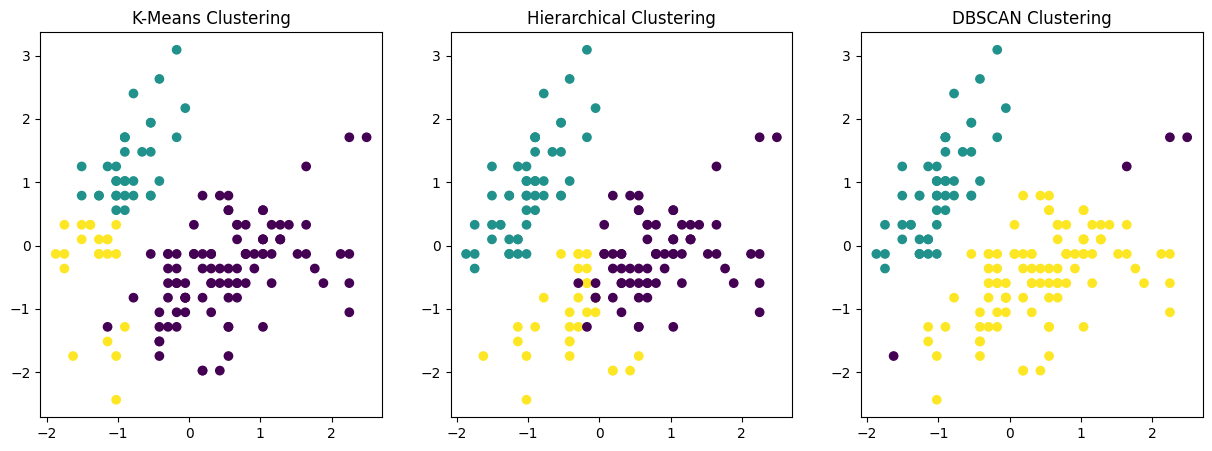

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
axs[0].set_title("K-Means Clustering")

axs[1].scatter(X[:, 0], X[:, 1], c=hier_labels, cmap='viridis')
axs[1].set_title("Hierarchical Clustering")

axs[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
axs[2].set_title("DBSCAN Clustering")

plt.show()

### Choosing best k for kmeans

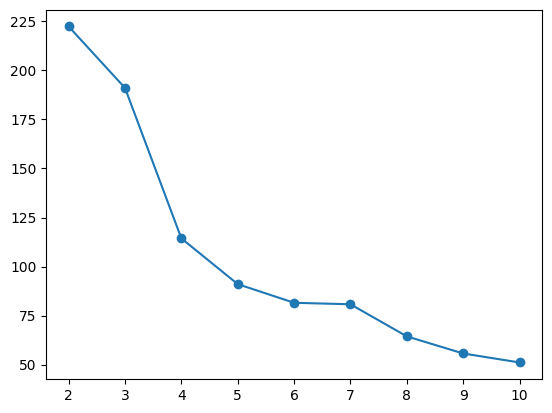

In [30]:
range_k = range(2,11)
wcss = []
sil_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

plt.plot(range_k, wcss, marker='o')

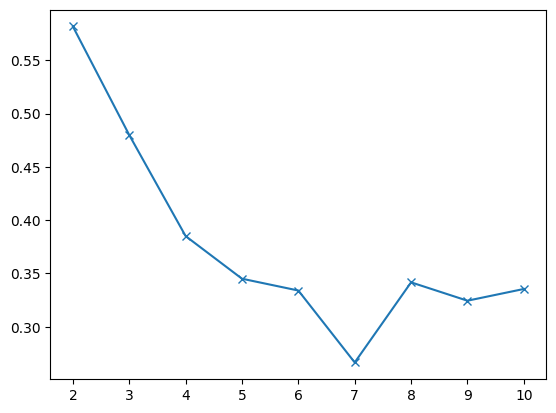

In [31]:
plt.plot(range_k, sil_scores, marker='x')

### dendogram clustering

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

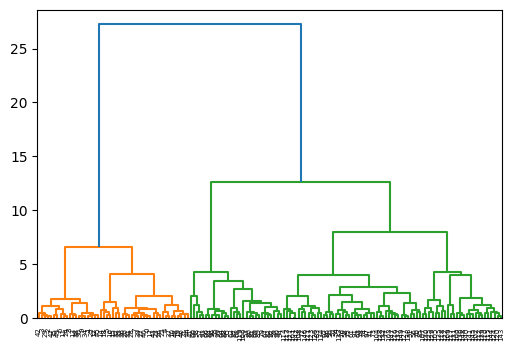

In [39]:
Z = linkage(X, method='ward')

plt.figure(figsize=(6,4))
dendrogram(Z)
plt.show()